# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
import numpy as np


# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


In [4]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
1,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
2,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
3,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
4,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0


# PCA + Random forest

Task 1: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [5]:
# Task 1
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9861111111111112

Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of Random forest + PCA.

In [6]:
# Task 2 
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler().fit(X_train)
X_train_std = standardScaler.transform(X_train)
X_test_std = standardScaler.transform(X_test)

# from scikit docs:  if n_components is not set all components are kept:
#n_components == min(n_samples, n_features)
pca = PCA().fit(X_train_std)
X_train_std = pca.transform(X_train_std)
X_test_std = pca.transform(X_test_std)

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_std, y_train);
y_pred = rf.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.9305555555555556

A1: As we didn't reduce any dimension - he might have thought fit and predict result of RandomForrestClassifier shouldn't get worse.

Q2: Did the results improve\stayed the same\got worse? 

A2: The results have gotten worse.



# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [7]:
# Task 3
lr = LogisticRegression(random_state = 42, max_iter = 10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.9444444444444444

In [8]:
# Task 4
from sklearn.preprocessing import StandardScaler

# from scikit docs:  if n_components is not set all components are kept:
#n_components == min(n_samples, n_features)
pca = PCA().fit(X_train_std)
X_train_std = pca.transform(X_train_std)
X_test_std = pca.transform(X_test_std)

lr = LogisticRegression(random_state = 42)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.9861111111111112

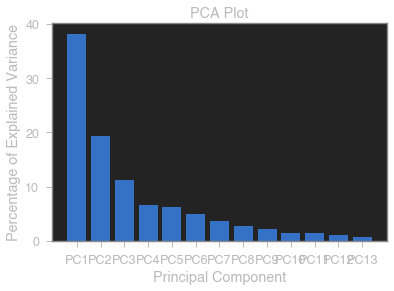

In [9]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

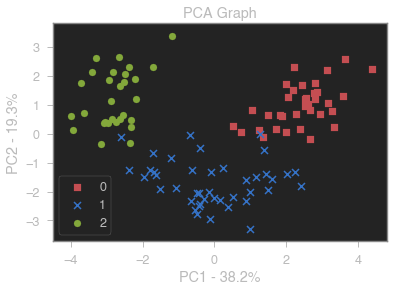

In [10]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_std[y_train==l, 0], 
                X_train_std[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.legend(loc='lower left')
plt.show()

Q3: Did the results improved\stayed the same\got worse?

A3: The results have improved.

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of Random forest from it.

A4: 
Using PCA on our data before feeding it to either of the classifiers without reducing dimensions has basically rotated our data. 
This rotation can pose a problem for Decision trees, as they try to horizontally and vertically split the data points.

Logistic regression, on the other hand, partitions the feature space by linear boundaries. Since PCA preserves the correlations between samples of the same clusters, and only rotates them, thus Logistic Regression is able to easily separate the clusters with linear boundaries.


# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

In [11]:
from sklearn.manifold import LocallyLinearEmbedding
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 9)})

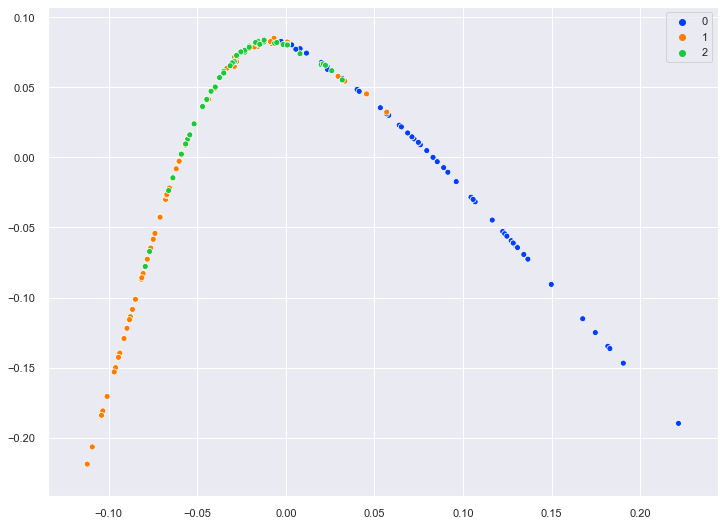

In [12]:
# Task 5
model = LocallyLinearEmbedding(n_neighbors=22, n_components=2, method='modified',
                               eigen_solver='dense', max_iter=1000)
X_transformed = model.fit_transform(X)

palette = sns.color_palette("bright", len(np.unique(y)))
sns.scatterplot(X_transformed[:, 0], X_transformed[:, 1], hue=y, legend='full', palette=palette);

Task 6: Use t-SNE to visualize the data. Plot the results.

In [13]:
from sklearn.manifold import TSNE

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.365570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.612633
[t-SNE] KL divergence after 650 iterations: 0.077024


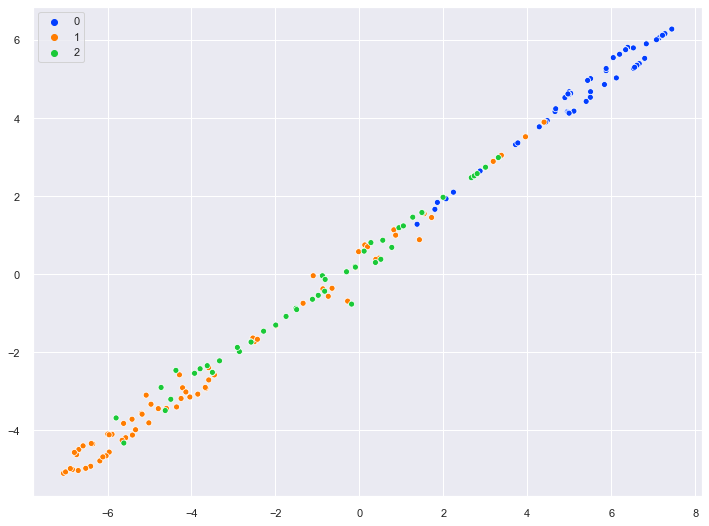

In [19]:
# Task 6
tsne = TSNE(n_components=2, verbose=1, perplexity=50, learning_rate=10, n_iter=5000)
X_transformed = tsne.fit_transform(X)

palette = sns.color_palette("bright", len(np.unique(y)))
sns.scatterplot(X_transformed[:, 0], X_transformed[:, 1], hue=y, legend='full', palette=palette);

Task 7: Use UMAP to visualize the data. Plot the results.

In [15]:
import umap

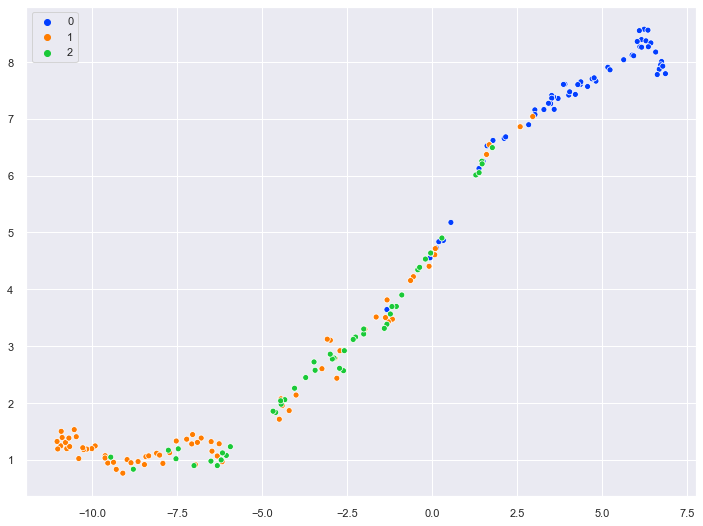

In [45]:
# Task 7
reducer = umap.UMAP(n_neighbors=50, n_components=2)
X_embedded = reducer.fit_transform(X)

palette = sns.color_palette("bright", len(np.unique(y)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette);

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

A5: If we run the t-SNE several times, we are expected to see different results.
The reason being that for each single point, picking neighboring points is being done in a stochastic manner, i.e. points that are far away have lower probability to get picked, as opposed to closer points.

Same goes for UMAP.